#team memebers
  PES1UG19CS110 : SECTION B : BHAVANA YADAV K    

PES1UG19CS124 : SECTION B : CHARUSHREE A        

PES1UG19CS279 : SECTION E : MOULYA T            


PES1UG19CS463 : SECTION G : SHREYA VISHWAS      


#LIBRARIES USED ARE


1.   torch
2.   torch _geometirc
3.  torch scatter
4. pandas 
5. numpy
6. networkx
7. sklearn
8. seaborn



installing dependencies

In [ ]:
!pip install torch
!pip install torch_geometric

     |████████████████████████████████| 407 kB 4.9 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=55632f57e43e6541d19fd1e6de4d0b24bc0337332541e20bf439b9645a2cb3ea
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [ ]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-spline-conv
!pip install torch-geometric

  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=279639 sha256=62570e1deae2264499a2ed8b67cd8fa1be639b7a4da716aecc8368582a4b5efb
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
     |████████████████████████████████| 48 kB 2.5 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=501789 sha256=2896b25957ff265c16325542e211be7e59970636c4012d1d3e72556dc28c073e
  Stored in directory: /root/.cache/pip/wheels/e0/01/be/6b2966e0ff20bb023ae35e5d17903e6e5b4df46dd5892f6be6
Successfully built torch-sparse
     |████████████████████████████████| 43 kB 894 kB/s 
  Created wheel for torch-cluster: filename=torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl size=309643 sha256=3a165dd10c04ad7db8e45c677f8b0ff9c5e062b28479e216fb074a76e7ca3fea
  Stored in directory: /root/.cache/pip/wheels/bc/c7/3e/258dd72b35d7a459264143ad5b

mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#building a session-based recommender system


The dataset comes from RecSys Challenge 2015, which is aiming to build a session-based recommender system. 

Here is the link to Dataset: https://www.kaggle.com/chadgostopp/recsys-challenge-2015

The dataset comprises two part:

1. yoochoose-clicks.dat  the click action
2. yoochoose-buys.dat the purchase action


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import random
import matplotlib.patches as mpatches
from itertools import count

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing of data

In [ ]:
# firstly, do some processing on the input data

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
# firstly, do some processing on the input data

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NAMPROJECT/yoochoose-clicks.dat', header=None,low_memory=False)
# since the original data is not labeled by columns, rename the columns
df.columns = ['session_id', 'timestamp', 'item_id', 'category']

buy_df = pd.read_csv('/content/drive/MyDrive/NAMPROJECT/yoochoose-buys.dat', header=None,low_memory=False)
buy_df.columns = ['session_id', 'timestamp', 'item_id', 'price', 'quantity']

df.head()

,session_id,timestamp,item_id,category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0


In [ ]:
# using sci-kit to encode the label for better feature recognition
item_encoder = LabelEncoder()
df['item_id'] = item_encoder.fit_transform(df.item_id)

In [ ]:
# sampling choose 100000 data, since my computer don't have GPU for cuda
# I tried to run more data, but it not worked without GPU
sampled_session_id = np.random.choice(df.session_id.unique(), 100000, replace=False)

# look up the choosed data feature
df = df.loc[df.session_id.isin(sampled_session_id)]
df.nunique()

session_id    100000
timestamp     357859
item_id        20228
category         114
dtype: int64

In [ ]:
# Add purchase information to the data set
df['label'] = df.session_id.isin(buy_df.session_id)
df.head()

,session_id,timestamp,item_id,category,label
215,69,2014-04-07T10:28:39.441Z,41305,0,False
216,69,2014-04-07T10:29:32.058Z,45481,0,False
561,178,2014-04-01T18:33:22.071Z,28989,0,False
562,178,2014-04-01T18:35:34.913Z,28988,0,False
563,178,2014-04-01T18:38:30.796Z,28988,0,False


#plotting graphs

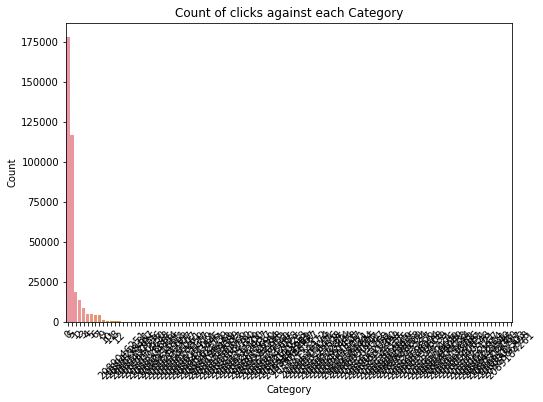

In [ ]:
category_analaysis = df[(df['category'].isin(['S','0','1','2','3','4','5','6','7','8','9','10','11','12']))]
plt.rcParams["figure.figsize"] = (8,5.5)
chart_4 = sns.barplot(x=df['category'].value_counts().index, y=df['category'].value_counts())
chart_4.set_xticklabels(chart_4.get_xticklabels(),rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of clicks against each Category')
plt.show()

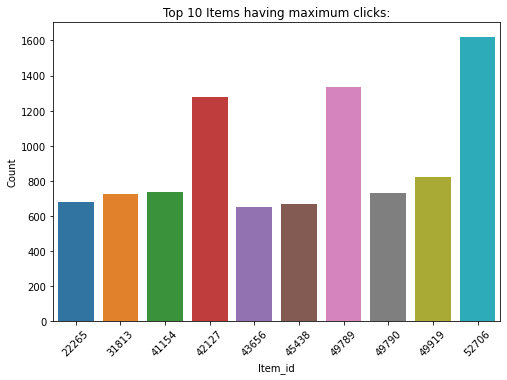

In [ ]:
chart_5 = sns.barplot(x=df['item_id'].value_counts().nlargest(10).index, y=df['item_id'].value_counts().nlargest(10))
chart_5.set_xticklabels(chart_5.get_xticklabels(),rotation=45)
plt.xlabel('Item_id')
plt.ylabel('Count')
plt.title('Top 10 Items having maximum clicks:')
plt.show()

Top 10 Items which have been bought the maximum.


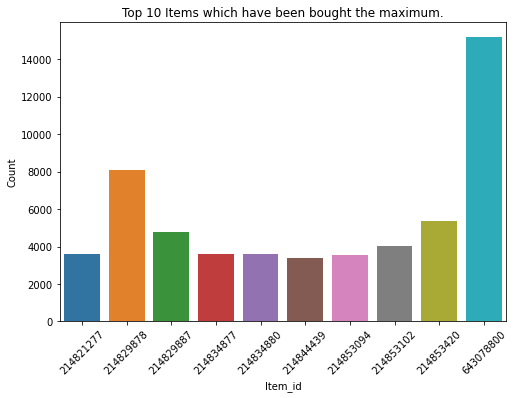

In [ ]:
print("Top 10 Items which have been bought the maximum.")
#print(buys['item_id'].value_counts().nlargest(10))
chart_1 = sns.barplot(x=buy_df['item_id'].value_counts().nlargest(10).index, y=buy_df['item_id'].value_counts().nlargest(10))
chart_1.set_xticklabels(chart_1.get_xticklabels(),rotation=45)
plt.xlabel('Item_id')
plt.ylabel('Count')
plt.title('Top 10 Items which have been bought the maximum.')
plt.show()

Top 10 items which are purchased in larger quantities.


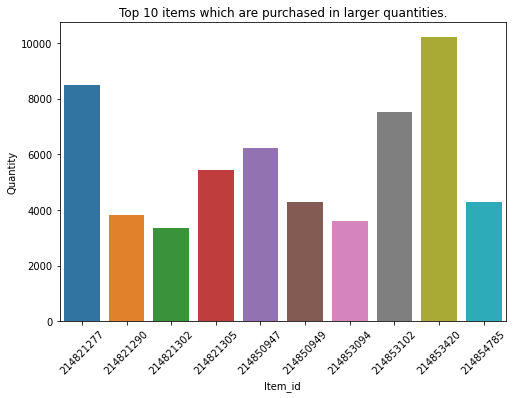

In [ ]:
print("Top 10 items which are purchased in larger quantities.")
quantity_analysis = buy_df[['item_id','quantity']].groupby('item_id').agg(total_quantity=pd.NamedAgg(column='quantity',aggfunc=sum))
quant_analysis = quantity_analysis.sort_values('total_quantity',ascending=False).nlargest(10,columns='total_quantity')
chart_2 = sns.barplot(x = quant_analysis.index, y = quant_analysis['total_quantity'] ,data = quant_analysis)
chart_2.set_xticklabels(chart_2.get_xticklabels(),rotation=45)
plt.xlabel('Item_id')
plt.ylabel('Quantity')
plt.title('Top 10 items which are purchased in larger quantities.')
plt.show()

Top 10 items Identifying the items having the maximum price.


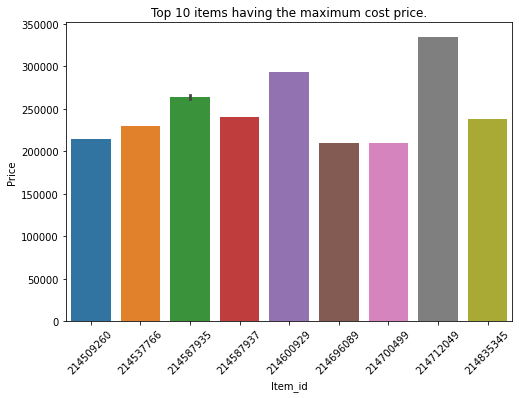

In [ ]:
print("Top 10 items Identifying the items having the maximum price.")
buys_plot = buy_df[['item_id','price']].drop_duplicates().sort_values('price',ascending=False).nlargest(10,columns='price')
chart_3 = sns.barplot(x = buys_plot['item_id'] , y = buys_plot['price'] ,data = buys_plot)
chart_3.set_xticklabels(chart_3.get_xticklabels(),rotation=45)
plt.xlabel('Item_id')
plt.ylabel('Price')
plt.title('Top 10 items having the maximum cost price.')
plt.show()

#Graph analysis

In [ ]:

G = nx.from_pandas_edgelist(df[0:1000], 'session_id', 'item_id')
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 784
Nodes: [69, 41305, 45481, 178, 28989, 28988, 454, 43947, 814, 41220, 43630, 41216, 782, 45561, 45319, 861, 45187, 1024, 41281, 41232, 1339, 29378, 31791, 1534, 29023, 28987, 9833, 1432, 41960, 22731, 6582, 1423, 34930, 1788, 1702, 1959, 31794, 32144, 2264, 16340, 12452, 12539, 2498, 43128, 31805, 39977, 2366, 12936, 39332, 39905, 2814, 39909, 5729, 2672, 39452, 716, 2991, 27508, 3017, 29008, 29006, 2858, 39396, 41261, 2841, 44146, 44104, 44145, 44129, 39322, 3144, 7307, 28403, 3521, 39475, 30631, 39690, 3474, 26906, 22265, 22666, 3491, 39967, 39968, 3811, 39622, 39928, 22463, 18944, 43649, 3719, 45331, 45755, 19470, 14729, 3998, 38464, 39390, 39400, 3956, 39913, 4527, 42079, 4507, 4489, 28984, 4586, 7047, 41298, 8566, 9860, 22548, 31092, 28911, 12872, 27160, 21988, 39932, 45209, 4571, 26000, 25839, 41046, 4152, 20463, 27459, 13193, 4097, 41180, 22423, 4114, 10255, 4187, 23614, 2433, 24430, 46767, 46768, 46750, 46634, 46221, 45702, 4276, 27512, 27503, 2

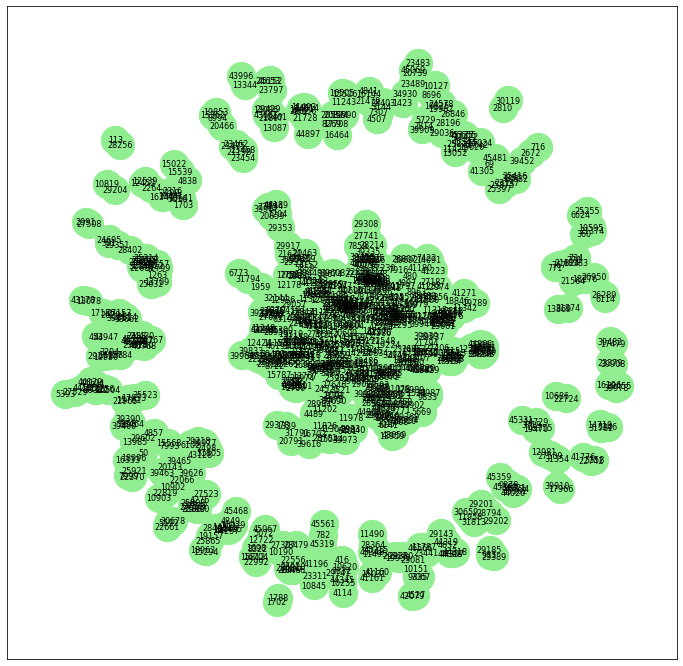

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


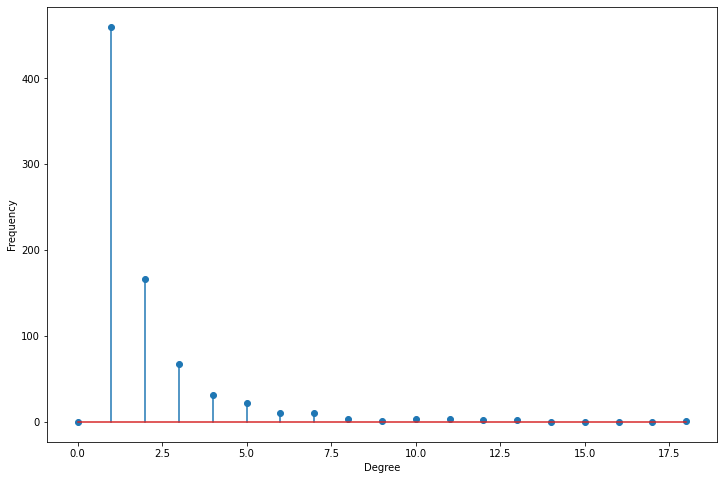

In [ ]:
deg_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize = (12, 8))
plt.stem(deg_freq)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()


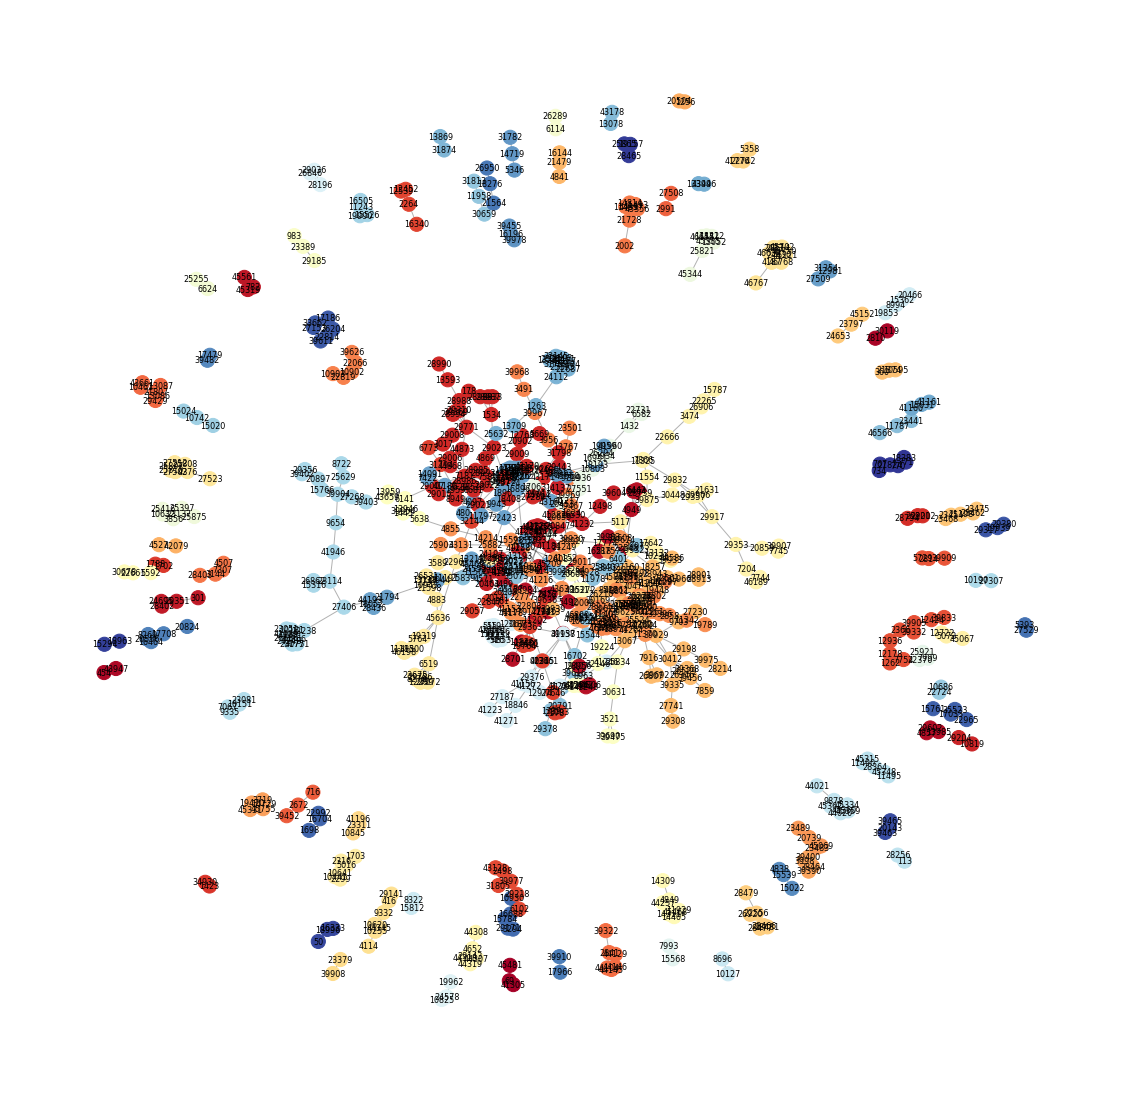

The communities detected are:
[(69, 0), (41305, 0), (45481, 0), (30119, 1), (2810, 1), (454, 2), (43947, 2), (29602, 3), (4857, 3), (13985, 3), (4489, 4), (28984, 4), (22548, 4), (4949, 4), (28739, 4), (6442, 4), (19464, 4), (7876, 4), (5492, 4), (27413, 4), (27146, 4), (41158, 4), (11826, 4), (11202, 4), (28701, 4), (16518, 4), (39903, 4), (23264, 4), (24521, 4), (28956, 4), (44806, 4), (41248, 4), (782, 5), (45561, 5), (45319, 5), (29351, 6), (28402, 6), (24695, 6), (301, 6), (1024, 7), (41281, 7), (41232, 7), (4152, 7), (20463, 7), (27459, 7), (13193, 7), (6112, 7), (41184, 7), (5859, 7), (39935, 7), (41258, 7), (8399, 7), (41162, 7), (12937, 7), (41255, 7), (41256, 7), (41254, 7), (41229, 7), (12849, 7), (12498, 7), (39604, 7), (14137, 7), (29443, 7), (20847, 7), (26530, 7), (29204, 8), (10819, 8), (178, 9), (28989, 9), (28988, 9), (1534, 9), (29023, 9), (28987, 9), (9833, 9), (3017, 9), (29008, 9), (29006, 9), (4869, 9), (28985, 9), (29007, 9), (7581, 9), (29021, 9), (29022, 9), (

In [ ]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

print("The communities detected are:")
print(sorted(partition.items(), key = lambda item:item[1]))

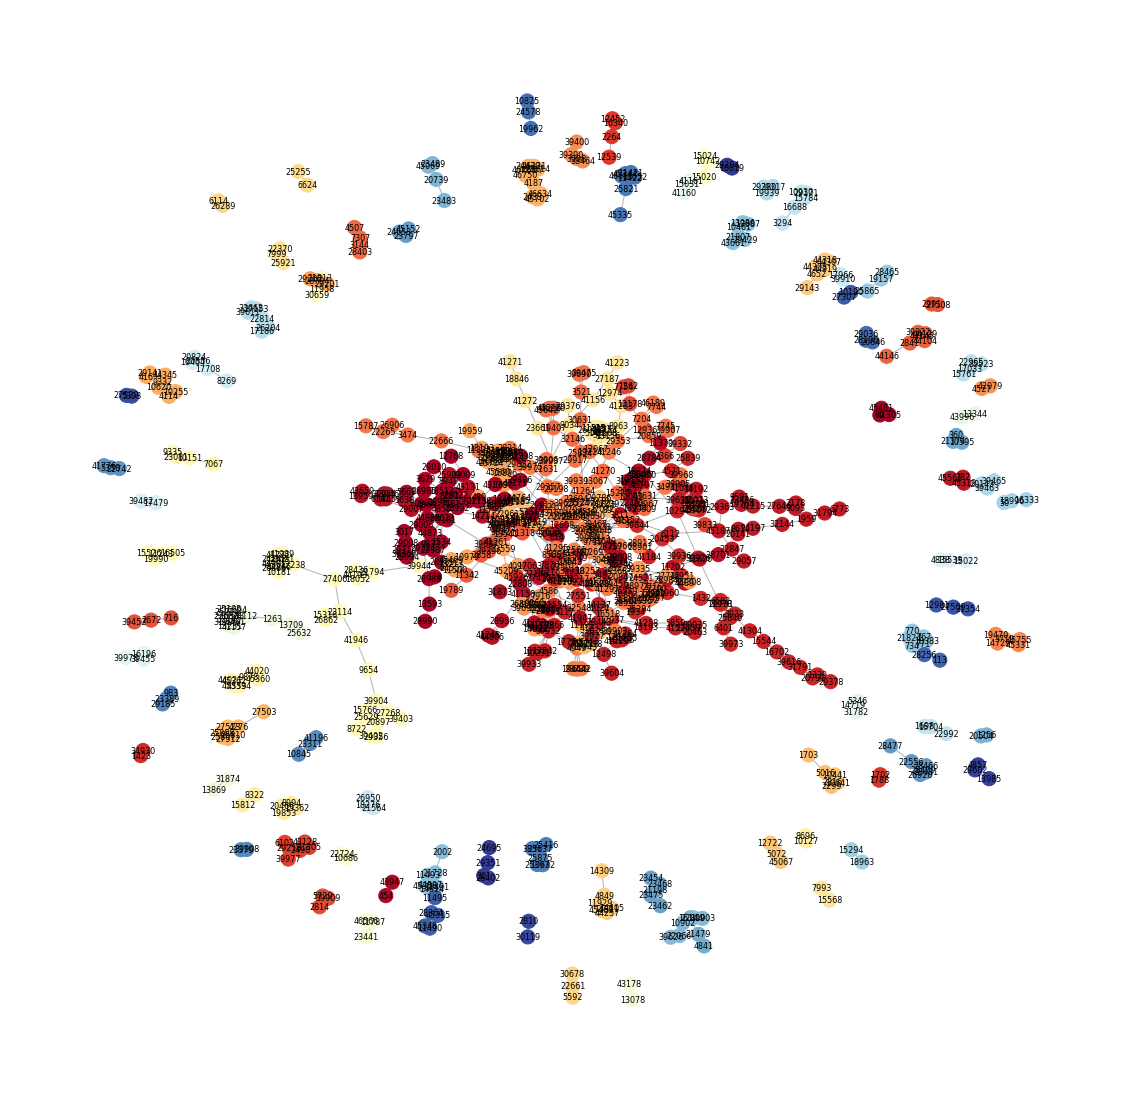

The communities detected are:
[(69, 0), (41305, 0), (45481, 0), (178, 1), (28989, 1), (28988, 1), (1534, 1), (29023, 1), (28987, 1), (9833, 1), (3017, 1), (29008, 1), (29006, 1), (4869, 1), (28985, 1), (7581, 1), (29021, 1), (29022, 1), (7181, 1), (28992, 1), (28986, 1), (44868, 1), (44873, 1), (8949, 1), (29010, 1), (8681, 1), (12768, 1), (29009, 1), (13593, 1), (28990, 1), (43171, 1), (18408, 1), (29012, 1), (18513, 1), (3629, 1), (21738, 1), (27284, 1), (43170, 1), (20902, 1), (5669, 1), (29771, 1), (29310, 1), (39369, 1), (28994, 1), (29486, 1), (31798, 1), (454, 2), (43947, 2), (814, 3), (43630, 3), (41216, 3), (3811, 3), (39622, 3), (39928, 3), (22463, 3), (18944, 3), (10009, 3), (46800, 3), (46797, 3), (11407, 3), (43946, 3), (10853, 3), (31815, 3), (41947, 3), (12608, 3), (18974, 3), (21249, 3), (39930, 3), (22808, 3), (31873, 3), (22777, 3), (41178, 3), (41179, 3), (41153, 3), (28784, 3), (11370, 3), (28757, 3), (39674, 3), (39608, 3), (41220, 4), (4489, 4), (28984, 4), (6141,

In [ ]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

print("The communities detected are:")
print(sorted(partition.items(), key = lambda item:item[1]))

In [ ]:
print(nx.transitivity(G))


0


#local clustering

In [ ]:
local_clustering = (nx.clustering(G))
local_clustering


{50: 0,
 69: 0,
 89: 0,
 113: 0,
 178: 0,
 301: 0,
 360: 0,
 416: 0,
 454: 0,
 480: 0,
 514: 0,
 515: 0,
 516: 0,
 519: 0,
 716: 0,
 734: 0,
 767: 0,
 770: 0,
 771: 0,
 782: 0,
 814: 0,
 861: 0,
 983: 0,
 1024: 0,
 1256: 0,
 1262: 0,
 1263: 0,
 1339: 0,
 1423: 0,
 1432: 0,
 1445: 0,
 1534: 0,
 1698: 0,
 1702: 0,
 1703: 0,
 1788: 0,
 1890: 0,
 1934: 0,
 1959: 0,
 2002: 0,
 2178: 0,
 2264: 0,
 2299: 0,
 2316: 0,
 2366: 0,
 2433: 0,
 2498: 0,
 2672: 0,
 2700: 0,
 2709: 0,
 2716: 0,
 2732: 0,
 2810: 0,
 2814: 0,
 2841: 0,
 2858: 0,
 2991: 0,
 3017: 0,
 3144: 0,
 3294: 0,
 3474: 0,
 3491: 0,
 3521: 0,
 3589: 0,
 3629: 0,
 3682: 0,
 3719: 0,
 3811: 0,
 3856: 0,
 3933: 0,
 3956: 0,
 3998: 0,
 4097: 0,
 4114: 0,
 4152: 0,
 4187: 0,
 4276: 0,
 4489: 0,
 4507: 0,
 4527: 0,
 4571: 0,
 4586: 0,
 4652: 0,
 4838: 0,
 4841: 0,
 4849: 0,
 4853: 0,
 4855: 0,
 4857: 0,
 4869: 0,
 4883: 0,
 4909: 0,
 4949: 0,
 5016: 0,
 5072: 0,
 5117: 0,
 5346: 0,
 5358: 0,
 5393: 0,
 5492: 0,
 5592: 0,
 5638: 0,
 5669:

To make GNN, we need to first imagine a model. In this case, every session is a big graph and inside the node comprises two parts infomation:

1. whether it is purchased
2. the item id of the good

And every node in the graph is conencting together like linkedlist

In [ ]:
import torch
from torch_geometric.data import InMemoryDataset
from torch_geometric.data import Data
from tqdm import tqdm

class YooChooseBinaryDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super(YooChooseBinaryDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return []
    @property
    def processed_file_names(self):
        return ['./yoochoose_processed.dataset']

    def download(self):
        pass
    
    def process(self):
        
        data_list = []

        # process by session_id
        grouped = df.groupby('session_id')
        for session_id, group in tqdm(grouped):
            sess_item_id = LabelEncoder().fit_transform(group.item_id)
            group = group.reset_index(drop=True)
            group['sess_item_id'] = sess_item_id
            node_features = group.loc[group.session_id==session_id,['sess_item_id','item_id']].sort_values('sess_item_id').item_id.drop_duplicates().values

            node_features = torch.LongTensor(node_features).unsqueeze(1)
            target_nodes = group.sess_item_id.values[1:]
            source_nodes = group.sess_item_id.values[:-1]

            edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)
            x = node_features

            y = torch.FloatTensor([group.label.values[0]])

            data = Data(x=x, edge_index=edge_index, y=y)
            data_list.append(data)
        
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

In [ ]:
# Separate the three data sets
dataset = YooChooseBinaryDataset("./")
dataset = dataset.shuffle()
train_dataset = dataset[:80000]
val_dataset = dataset[80000:90000]
test_dataset = dataset[90000:]
len(train_dataset), len(val_dataset), len(test_dataset)

Processing...
  0%|          | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
100%|██████████| 100000/100000 [04:55<00:00, 338.33it/s]
Done!


(80000, 10000, 10000)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

embed_dim = 128

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = SAGEConv(embed_dim, 128)
        self.pool1 = TopKPooling(128, ratio=0.8)
        self.conv2 = SAGEConv(128, 128)
        self.pool2 = TopKPooling(128, ratio=0.8)
        self.conv3 = SAGEConv(128, 128)
        self.pool3 = TopKPooling(128, ratio=0.8)
        self.item_embedding = torch.nn.Embedding(num_embeddings=df.item_id.max() +1, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(256, 128)
        self.lin2 = torch.nn.Linear(128, 64)
        self.lin3 = torch.nn.Linear(64, 1)
        self.bn1 = torch.nn.BatchNorm1d(128)
        self.bn2 = torch.nn.BatchNorm1d(64)
        self.act1 = torch.nn.ReLU()
        self.act2 = torch.nn.ReLU()

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.item_embedding(x)
        x = x.squeeze(1)
        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)
        x = F.relu(self.conv2(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)
        x = F.relu(self.conv3(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool3(x, edge_index, None, batch)
        x3 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)
        x = x1 + x2 + x3
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x

In [ ]:
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops


class SAGEConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(SAGEConv, self).__init__(aggr='max')  # "Max" aggregation.
        self.lin = torch.nn.Linear(in_channels, out_channels)
        self.act = torch.nn.ReLU()
        self.update_lin = torch.nn.Linear(in_channels + out_channels, in_channels, bias=False)
        self.update_act = torch.nn.ReLU()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        edge_index, _ = remove_self_loops(edge_index)
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)

    def message(self, x_j):
        # x_j has shape [E, in_channels]

        x_j = self.lin(x_j)
        x_j = self.act(x_j)

        return x_j

    def update(self, aggr_out, x):
        # aggr_out has shape [N, out_channels]

        new_embedding = torch.cat([aggr_out, x], dim=1)

        new_embedding = self.update_lin(new_embedding)
        new_embedding = self.update_act(new_embedding)
        return new_embedding

In [ ]:
from torch_geometric.data import DataLoader

def train():
    model.train()

    loss_all = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        label = data.y.to(device)
        loss = crit(output, label)
        loss.backward()
        loss_all += data.num_graphs * loss.item()
        optimizer.step()
    return loss_all / len(train_dataset)

device = torch.device('cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
crit = torch.nn.BCELoss()

In [ ]:
from sklearn.metrics import roc_auc_score
def evaluate(loader):
    model.eval()

    predictions = []
    labels = []

    with torch.no_grad():
        for data in loader:

            data = data.to(device)
            pred = model(data).detach().cpu().numpy()
            print(pred)
            label = data.y.detach().cpu().numpy()
            predictions.append(pred)

            labels.append(label)
    predictions = np.hstack(predictions)
    labels = np.hstack(labels)
    return roc_auc_score(labels,predictions)

In [ ]:
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_dataset, batch_size=64)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)
val_ac=[]
train_ac=[]
test_ac=[]
for epoch in range(3):
    loss = train()
    train_acc=evaluate(train_loader)
    val_acc=evaluate(val_loader)
    test_acc=evaluate(test_loader)

    train_ac.append(evaluate(train_loader))
    val_ac.append(evaluate(val_loader))    
    test_ac.append(evaluate(test_loader))
    print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f}, Val Auc: {:.5f}, Test Auc: {:.5f}'.
          format(epoch, loss, train_acc, val_acc, test_acc))

Streaming output truncated to the last 5000 lines.
 1.24166608e-02 1.15326680e-01 1.70259289e-02 5.22701219e-02]
[1.9977069e-03 1.5132737e-04 1.3147959e-03 1.0289458e-03 5.1245825e-05
 1.2433395e-03 6.8868823e-02 2.2986752e-01 1.0142593e-02 3.2640560e-04
 2.9454805e-02 2.8541093e-03 2.8512223e-02 9.9079654e-02 2.9857268e-04
 2.4633508e-02 6.7269726e-04 7.2990628e-03 3.2412776e-05 1.8062953e-02
 9.1919042e-03 1.0479291e-03 5.2777061e-04 3.0341174e-03 2.2986752e-01
 1.9531297e-03 1.6308412e-02 2.8247782e-04 1.8070538e-02 1.9204672e-03
 5.9586443e-02 2.2986752e-01 9.0807667e-03 3.7081469e-02 4.3305452e-05
 2.0359041e-02 1.1005103e-01 1.8961469e-02 1.3321506e-02 4.1603442e-05
 6.9862038e-02 1.3186646e-03 8.3302977e-03 1.5661267e-03 1.4252896e-02
 2.1372205e-03 1.5911797e-02 8.3918720e-02 1.1538287e-01 1.3227137e-03
 1.4553815e-05 2.2986752e-01 5.7052395e-05 8.9847026e-03 1.4048413e-04
 6.9542527e-03 7.9990103e-04 6.6629262e-04 4.0847939e-02 4.2959814e-06
 3.0366660e-05 2.2986752e-01 1.6169

In [ ]:
Y_TRAIN=np.array(range(0,len(train_ac)))
Y_VALID=np.array(range(0,len(val_ac)))
Y_TEST=np.array(range(0,len(test_ac)))


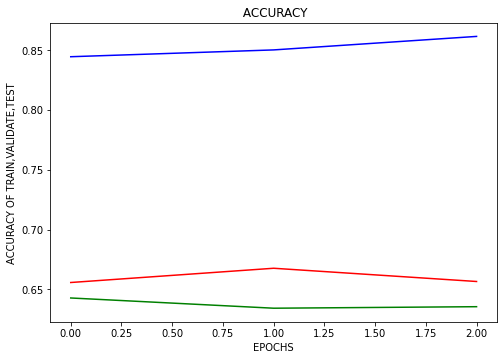

In [ ]:
plt.plot( Y_TRAIN,train_ac,'b',label='train')
plt.plot(Y_VALID,val_ac,'g',label='validate')
plt.plot(Y_TEST,test_ac,'r',label='test')

plt.title(" ACCURACY")

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY OF TRAIN,VALIDATE,TEST")
plt.show()